In [21]:

import tensorflow as tf
import itertools
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
import pydotplus as pydot

In [22]:
import pandas as pd
from sklearn.datasets import fetch_openml

boston=fetch_openml(name='boston', version=2)

boston_data=pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_data['MEDV']=boston.target


c:\Users\aadit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,N
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,P
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,N
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,N
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,N


c:\Users\aadit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aadit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


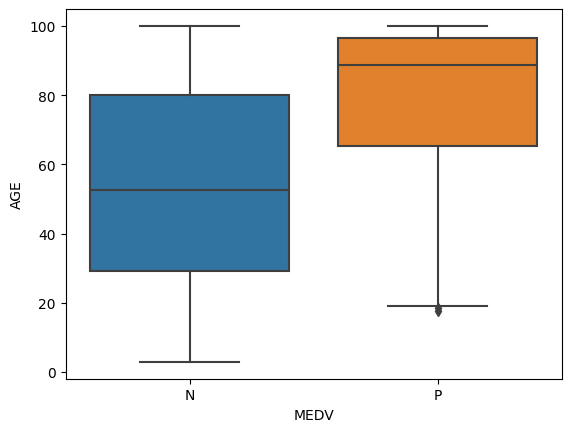

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='MEDV', y='AGE', data=boston_data)
plt.show()

In [25]:
boston_data=pd.get_dummies(boston_data, columns=['MEDV'], drop_first=True)
boston_data.replace({True:1, False:0}, inplace=True)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV_P
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0


In [26]:
from sklearn.model_selection import train_test_split

X= boston_data.drop('MEDV_P', axis=1)
y=boston_data['MEDV_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
tf.random.set_seed(42)
np.random.seed(42)

model=Sequential()
model.add(Dense(units=12, activation='linear', input_dim=X_train.shape[1], kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Dense(units=16, activation='tanh'))
model.add(Dense(units=20, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))


In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint], verbose=2, shuffle=False)


Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.76471, saving model to best_model.h5
13/13 - 2s - loss: 0.5839 - accuracy: 0.7351 - val_loss: 0.5321 - val_accuracy: 0.7647 - 2s/epoch - 120ms/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.76471 to 0.78431, saving model to best_model.h5
13/13 - 0s - loss: 0.5086 - accuracy: 0.7995 - val_loss: 0.4715 - val_accuracy: 0.7843 - 109ms/epoch - 8ms/step
Epoch 3/10


c:\Users\aadit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_accuracy improved from 0.78431 to 0.86275, saving model to best_model.h5
13/13 - 0s - loss: 0.4609 - accuracy: 0.8144 - val_loss: 0.4304 - val_accuracy: 0.8627 - 117ms/epoch - 9ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.86275
13/13 - 0s - loss: 0.4288 - accuracy: 0.8144 - val_loss: 0.4013 - val_accuracy: 0.8431 - 64ms/epoch - 5ms/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.86275
13/13 - 0s - loss: 0.4062 - accuracy: 0.8267 - val_loss: 0.3796 - val_accuracy: 0.8333 - 78ms/epoch - 6ms/step
Epoch 6/10

Epoch 6: val_accuracy did not improve from 0.86275
13/13 - 0s - loss: 0.3892 - accuracy: 0.8441 - val_loss: 0.3619 - val_accuracy: 0.8529 - 78ms/epoch - 6ms/step
Epoch 7/10

Epoch 7: val_accuracy improved from 0.86275 to 0.87255, saving model to best_model.h5
13/13 - 0s - loss: 0.3753 - accuracy: 0.8490 - val_loss: 0.3461 - val_accuracy: 0.8725 - 117ms/epoch - 9ms/step
Epoch 8/10

Epoch 8: val_accuracy improved from 0.87255 to 0.88235, s

In [30]:
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

4/4 [==============================] - 0s 5ms/step - loss: 0.3065 - accuracy: 0.9020
Test Accuracy: 90.20%


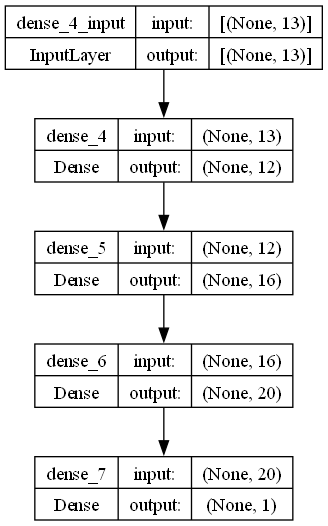

In [31]:
# Load the best model
best_model = load_model('best_model.h5')

# Visualize the best model architecture
plot_model(best_model, to_file='best_model_plot.png', show_shapes=True, show_layer_names=True)

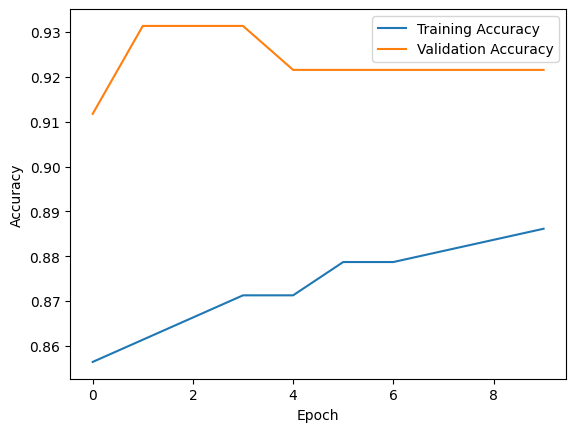

In [32]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


4/4 [==============================] - 0s 5ms/step


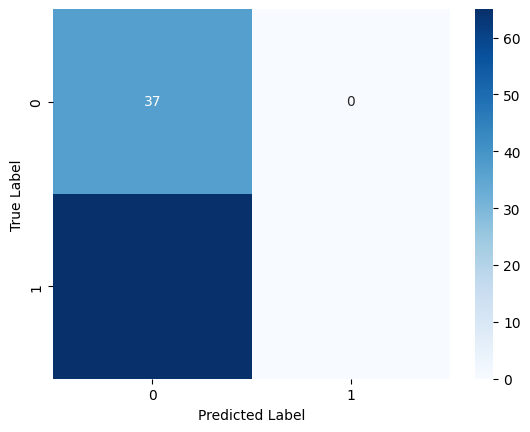

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming model is your trained Sequential model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


# Assuming y_test and y_pred are obtained as described above
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


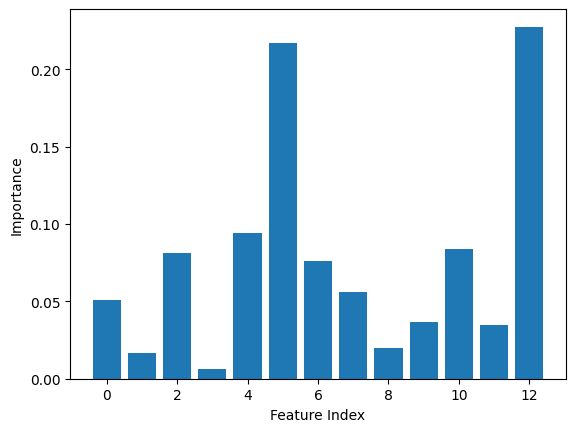

In [34]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a model (e.g., RandomForestClassifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Plot feature importance
feature_importance = model.feature_importances_
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()


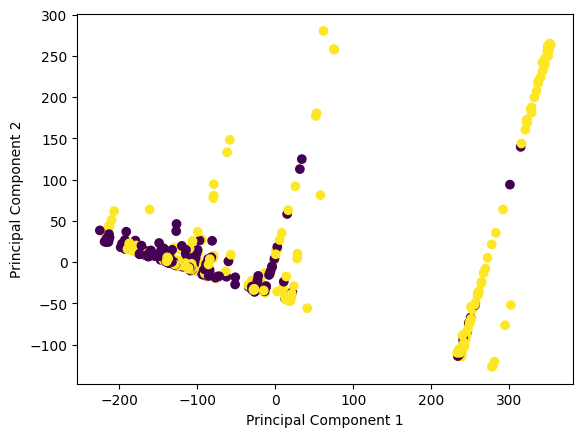

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Plot 2D projection
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
